In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#Encoding
from category_encoders.target_encoder import TargetEncoder
te = TargetEncoder()
dataset[['Geography','Gender']] = en = te.fit_transform(dataset[['Geography','Gender']],dataset.Exited)

In [6]:
df = dataset[['CreditScore','Geography','Gender','Age','Tenure','Balance',
              'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.161548,0.250715,42,2,0.00,1,1,1,101348.88,1
1,608,0.166734,0.250715,41,1,83807.86,1,0,1,112542.58,0
2,502,0.161548,0.250715,42,8,159660.80,3,1,0,113931.57,1
3,699,0.161548,0.250715,39,1,0.00,2,0,0,93826.63,0
4,850,0.166734,0.250715,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.203700,0.203700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.069907,0.042900,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.161548,0.164559,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.161548,0.164559,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.161548,0.164559,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,0.324432,0.250715,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,0.324432,0.250715,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Formulating Questions
* Find out the percentage of people who left the bank when their salary was less than average.
* Did people who have shorter tenure leave the bank?
* What percentage of people with higher balance leave?
* Did number of products affect their decision to leave?
* Does age affect decision to leave the bank?

Total number of people who left the bank

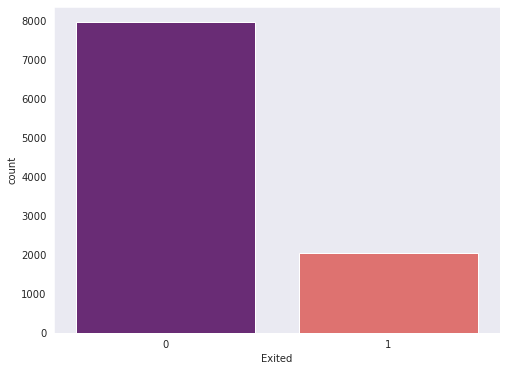

In [9]:
plt.figure(figsize=(8,6))
sns.set_style('dark')
sns.countplot(x='Exited',data=df,palette='magma')

In [10]:
corelation = df.corr()

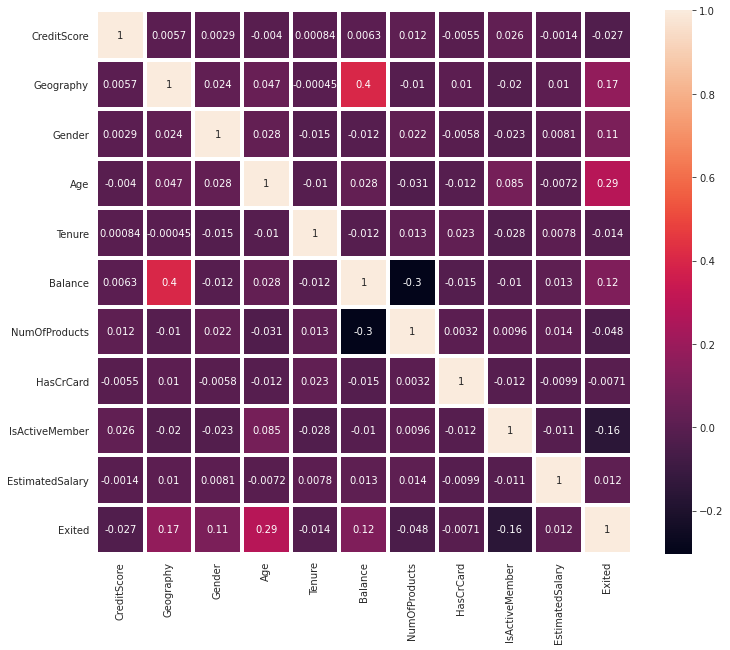

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(corelation,linecolor='white',linewidths=3,annot=True)

Although most attributes dont have high correlation, it seems like age and geography slightly affect whether people leave the bank or not.

### Find out the percentage of people who left the bank when their salary was less than average.

In [12]:
avg_sal = df.EstimatedSalary.mean()
below_avg = df.loc[(df.EstimatedSalary < avg_sal) & (df.Exited == 1)]

In [13]:
print(below_avg.Exited.count()/100,'%')

9.95 %


The percentage of people who had below average Estimated salary and left the bank.

### Did people who have shorter tenure leave the bank?

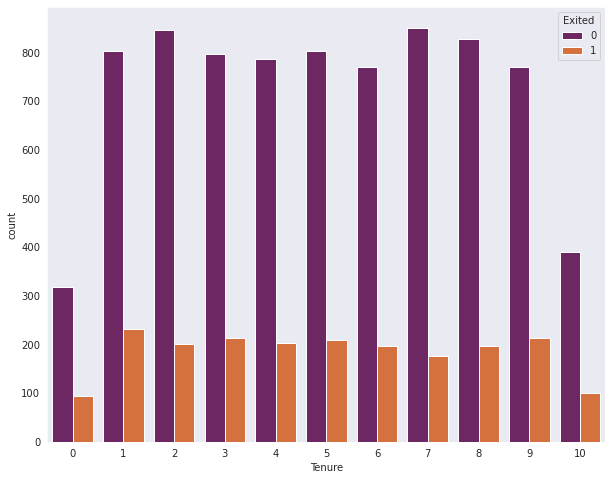

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(df.Tenure,hue='Exited',data=df,palette='inferno')

Looks like tenure does not affect whether customers leave the bank or not.

### What percentage of people with higher balance leave?

In [15]:
print(df.loc[(df.Balance > df.Balance.mean())&(df.Exited == 1)].Balance.count()/100,'%')

14.26 %


This is the percentage of people who have higher than avg Balance in their bank and left the bank.

 ### Did number of products affect their decision to leave?

In [16]:
products_ex = df[['NumOfProducts','Exited']]
products_ex = products_ex.loc[(products_ex.Exited == 1)]

In [17]:
group = products_ex.groupby('NumOfProducts',as_index=False).count()

In [18]:
counts=[]
counts.append(df.loc[(df.NumOfProducts==1)].NumOfProducts.count())
counts.append(df.loc[(df.NumOfProducts==2)].NumOfProducts.count())
counts.append(df.loc[(df.NumOfProducts==3)].NumOfProducts.count())
counts.append(df.loc[(df.NumOfProducts==4)].NumOfProducts.count())
for i in range(len(counts)):
    print('Total percentage of people with '+str(i+1)+' product(s) :',(counts[i]/100),'%')

Total percentage of people with 1 product(s) : 50.84 %
Total percentage of people with 2 product(s) : 45.9 %
Total percentage of people with 3 product(s) : 2.66 %
Total percentage of people with 4 product(s) : 0.6 %


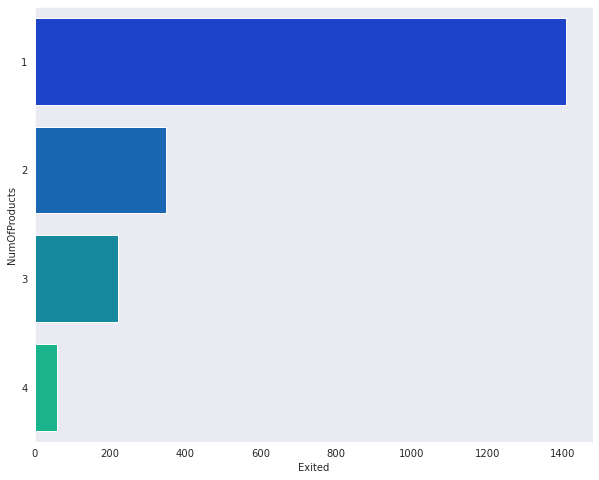

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x='Exited', y='NumOfProducts', data=group,orient='h',palette='winter')

In [20]:
group

,NumOfProducts,Exited
0,1,1409
1,2,348
2,3,220
3,4,60


From the plot we can observe that almost all the people with NumOfProducts = [3,4] left the bank, but Since the total number of samples for ordinals 3 and 4 is very less compared to 1 and 2, it cannot be concluded that people with more NumOfProducts leave the bank. 

### Does age affect decision to leave the bank?

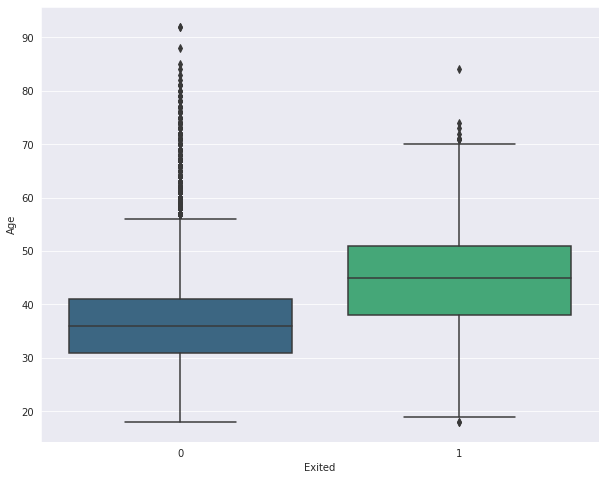

In [21]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.boxplot(x="Exited", y="Age", data=df,palette='viridis')

In [22]:
print(df.loc[(df.Age>40)&(df.Age<55)].Exited.count()/100,'%')

26.99 %


The boxplot tells that majority of the people who left the bank are around 40-55 years old. 

### Trying to improve correlation by removing outliers

In [23]:
#Finding the IQR
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
iqr

CreditScore           134.000000
Geography               0.162884
Gender                  0.086156
Age                    12.000000
Tenure                  4.000000
Balance            127644.240000
NumOfProducts           1.000000
HasCrCard               1.000000
IsActiveMember          1.000000
EstimatedSalary     98386.137500
Exited                  0.000000
dtype: float64

Now that we have our IQR we can detect and remove outliers from our data.

In [24]:
df.shape

(10000, 11)

In [25]:
df2 = df[~((df.iloc[:,:-1] < (q1 - 1.5 * iqr)) |(df.iloc[:,:-1] > (q3 + 1.5 * iqr))).any(axis=1)].copy()

In [26]:
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.161548,0.250715,42,2,0.00,1,1,1,101348.88,1
1,608,0.166734,0.250715,41,1,83807.86,1,0,1,112542.58,0
2,502,0.161548,0.250715,42,8,159660.80,3,1,0,113931.57,1
3,699,0.161548,0.250715,39,1,0.00,2,0,0,93826.63,0
4,850,0.166734,0.250715,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0.161548,0.164559,39,5,0.00,2,1,0,96270.64,0
9996,516,0.161548,0.164559,35,10,57369.61,1,1,1,101699.77,0
9997,709,0.161548,0.250715,36,7,0.00,1,0,1,42085.58,1
9998,772,0.324432,0.164559,42,3,75075.31,2,1,0,92888.52,1


In [27]:
df2.dropna(inplace=True)

In [28]:
df2.shape

(9568, 11)

The method mentioned below is more specific and needs adjusting with boxplot as reference, but it can improve correlation more after tweaking. I have used IQR since it is more general and quicker.

In [29]:
#df3=df.copy()
#df3=df3[df3['Age']<np.percentile(df3['Age'],93)]
#df3=df3[df3['Age']>np.percentile(df3['Age'],5)]

In [30]:
#plt.figure(figsize=(10,8))
#sns.set_style('darkgrid')
#sns.boxplot(x="Exited", y="Age", data=df3,palette='cool')

### Checking correlation again

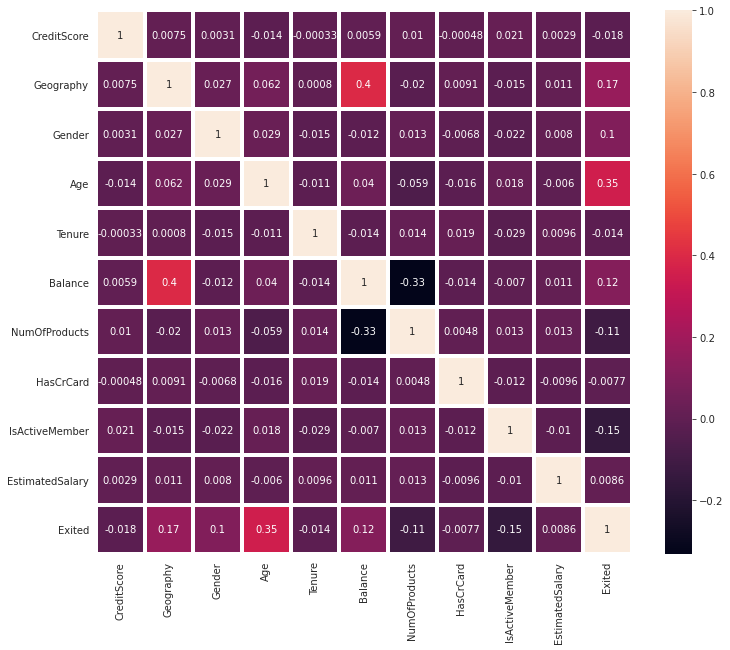

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(df2.corr(),linecolor='white',linewidths=3,annot=True)

### Let us compare the Heatmaps of the data with and without outliers

Let us consider the columns 'Age', 'Geography' and 'Exited'

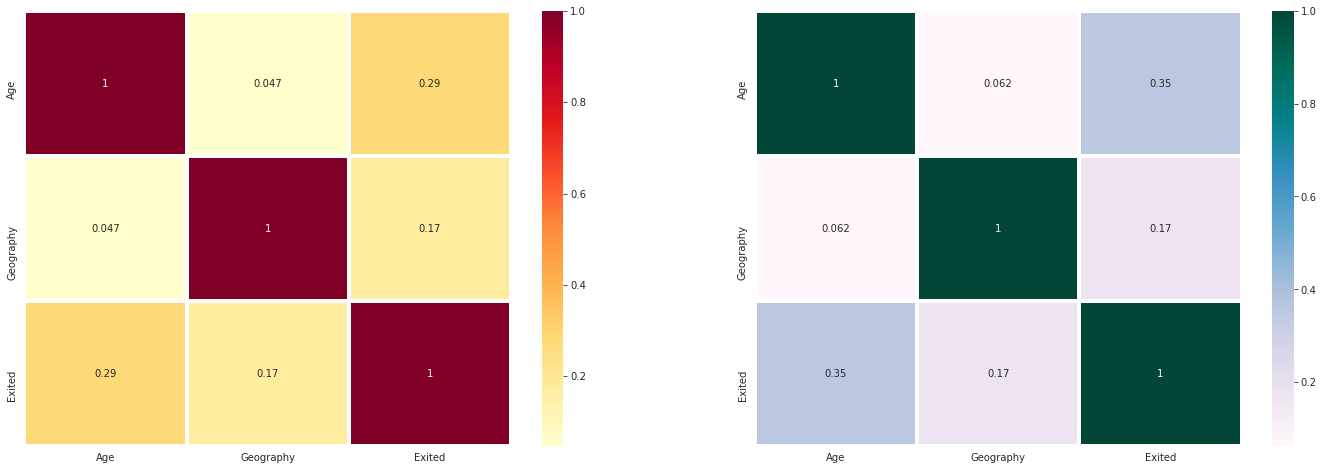

In [32]:
fig,ax = plt.subplots(1,2,figsize=(24,8))
sns.heatmap(df[['Age','Geography','Exited']].corr(),linecolor='white',linewidths=3,annot=True,ax=ax[0],cmap='YlOrRd')
sns.heatmap(df2[['Age','Geography','Exited']].corr(),linecolor='white',linewidths=3,annot=True,ax=ax[1],cmap='PuBuGn')

Although it is not a drastic change, the correlation between Age and Exited has improved. 